In [12]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy.stats as ss

GWASHITS = 'CLEC12A SLC12A1 ERAP2 C4BPA HLA-DRB5 C22orf32 BTN3A2 TMEM176B S100P FAM118A RNASET2 PADI2 TMEM164 NFXL1 CENPK TMEM176A KIAA1324 HLA-DRB1 PAM HLA-DRB6 SKAP2 CCDC23 C9orf78'.split(' ')   
RNABP  =  "/storage/szfeupe/Runs/GTEx_estr/FEATURES/RnaBindProtDB_2012-11-21.csv"
TRFAC  =  "/storage/szfeupe/Runs/GTEx_estr/FEATURES/TF_gene_list"
BASEDIR = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"
SNPS = "/storage/szfeupe/Runs/GTEx_estr/SNP_Analysis"
STRS = "/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/"
COLOR = ['b', 'm', 'g', 'k', 'y', 'r', 'grey']


def plotthat(Frame, BASEDIR):
    chs = list(Frame['chrom'])[0]
    gene = list(Frame['gene'])[0]
    start = list(Frame['best.str.start'])[0]
    tissue = list(Frame['best.tissue'])[0]
    score = list(Frame['best.score'])[0]
    
    snps=pd.read_csv(BASEDIR+tissue+"/SNP_Analysis/PQValues.txt", sep="\t",low_memory=False)
    expr = pd.read_csv(BASEDIR+tissue+"/Corr_Expr.csv",sep=',' ,low_memory=False) 
    snp =pd.read_csv(SNPS+"/SNP_raw_gt_"+chs, sep='\t',low_memory=False) #snps
    Genos=pd.read_csv(STRS+"STR_Raw_Gen."+chs, sep='\t',low_memory=False)
    #gene name
    S = snps.loc[snps['gene']==gene]['str.start']; S=int(S)
    Gene = Gene_table.loc[Gene_table['gene']==gene]['gene.name'].values[0]
    print('\n----->',chs,' gene ',gene,'(',Gene,')  Causality Score: ',score,'\nCounts by SNP genotypes')
    
    #restrict to samples
    samples = list(expr.index)
    Genosnp = snp.loc[snp['start']==S,samples]
    Genostr = Genos.loc[Genos['start']==start, samples]
    Genosnp = Genosnp.replace('None', np.nan) ; #print(Genosnp)
    Genostr = Genostr.replace('None', np.nan) ; #print(Genostr)
    #Expression
    Expr = expr[gene]
    
    #Figure    (1) STR vs EXPR
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.title(tissue+' tissue')
    plt.scatter(Genosnp, Expr, label='Lead SNP', color='b',marker='.')
    plt.ylabel(Gene+' expression')
    plt.xlabel('Best SNP genotypes')
    plt.subplot(132)
    plt.scatter(Genostr, Expr,label='eSTR', color='g',marker='.', s=10)
    #plt.ylabel(Gene+' Gene expression')
    plt.xlabel('eSTR genotypes \nSTR_'+str(int(start)))

    #Figure (2) Hold snp genotypes constant
    geno=list(set(Genosnp.values.tolist()[0]))
    geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
    n=len(geno) ; N=0
    ind=Genosnp.index[0]
    #fig = plt.figure(figsize=(8,6))
    plt.subplot(133) #
    for i in range(n):
        S = Genosnp.T.loc[Genosnp.T[ind]==geno[i]]
        sample=list(S.index)
        S['Exp']=Expr.loc[sample]
        S['Str']=Genostr.T.loc[sample][Genostr.index[0]]
        #print(N, list(S['Str']))
        S['Str'] = S['Str'].astype(float)
        S['Str']+=N
        if len(S['Exp'])==0:
            continue
        #ax = fig.add_subplot(n,1,1+i)
        print(geno[i], S.shape)
        plt.scatter(list(S['Str']), list(S['Exp']), color=COLOR[i], marker='.',s=8)
#        plt.title.set_text(Gene+' Expression @ SNP_genotype='+str(geno[i])+' ( n='+str(len(S['Exp']))+' )')
        if max(list(S['Str'].values))-min(list(S['Str'].values))!=0:
            N += max(list(S['Str'].values))-min(list(S['Str'].values))+25
        else:
            N +=max(list(S['Str'].values))+25
        #print(N, list(S['Str']))
    plt.title('STRs at SNPs genotypes \nSTR_'+str(int(start)))
    plt.xticks([])
    plt.show()
#END    

INSIGHT_eg = ["ENSG00000115129.9","ENSG00000018280.12","ENSG00000146648.11","ENSG00000164692.13","ENSG00000149948.9","ENSG00000111537.4","ENSG00000007171.12","ENSG00000100985.7"]


In [13]:
DATA  =  pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/LR_SummaryTest_Table.tsv', sep='\t',low_memory=False)
DATA1 = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/GTEx_merged_causality.table', sep='\t',low_memory=False)
Map = DATA[['chrom', 'gene','gene.name']].drop_duplicates(keep='first')
DATA1 = DATA1.merge(Map, on=['chrom','gene'])

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


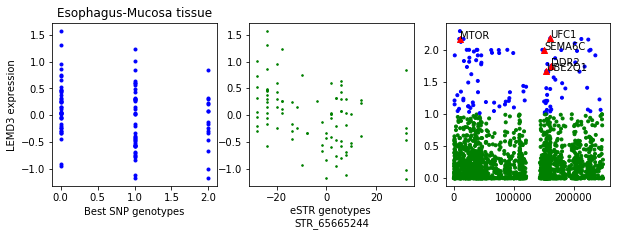

In [14]:
#Chromosome1 STRs most causal eSTRs in best tissues

chr1 = DATA1.loc[DATA1['chrom']=='chr1']
#chr1['text']=['' if (list(chr1['best.q'])[i]<=0.1 and list(chr1['best.score'])[i]>0.5)  else list(chr1['gene.name'])[i] for i in range(chr1.shape[0])] 
chr1['text'] = chr1['gene.name'].where((chr1['best.q']<=0.1) & (chr1['best.score']>0.5),'')

X = [float(x)/1000 for x in list(chr1['best.str.start'])]
Y = [-np.log10(x) for x in list(chr1['best.q'])]
text = list(chr1['text'])
col = ['b' if x>-np.log10(0.1) else 'g' for x in Y ]
#col0 = [col[i] if list(chr1['gene.name'])[i] not in list(chr1['text']) else 'r' for x in range(len(col))]
plt.scatter(X,Y,marker='.', c=col)
plt.scatter
#Annotate
for i, txt in enumerate(text):
    plt.annotate(txt, (X[i],Y[i]))

S = chr1.loc[(chr1['best.q']<=0.1) & (chr1['best.score']>0.5)]
plt.scatter(S['best.str.start']/1000, -np.log10(S['best.q']), marker='^', c='r')
plt.show()



-----> chr9  gene  ENSG00000136848.12 ( DAB2IP )  Causality Score:  0.213785450615 
Counts by SNP genotypes
0 (107, 3)
2 (2, 3)
1 (34, 3)


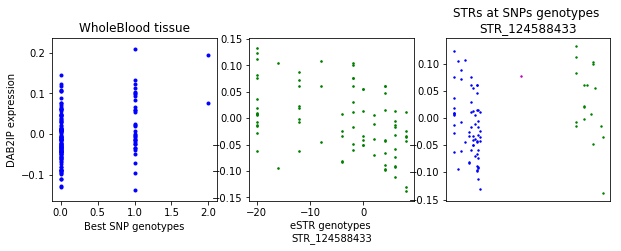


-----> chr1  gene  ENSG00000159339.9 ( PADI4 )  Causality Score:  0.0911615953576 
Counts by SNP genotypes
0 (36, 3)
2 (10, 3)
1 (55, 3)


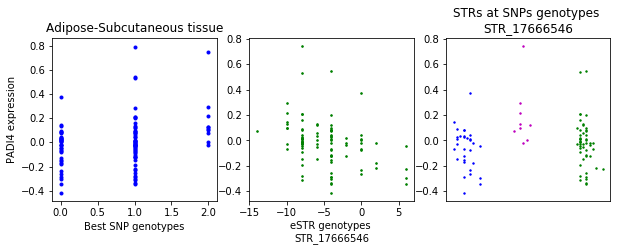

In [16]:
Gene_table = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/FEATURES/Genes_only_table', sep='\t')
"""
Figure X: Overlap with GWAS hits 
        List of some GWAS hit 
"""
data1 = DATA1.loc[DATA1['gene.name'].isin(["DAB2IP","PADI4"])] #eg from Colby Chiang et al.
data2 = DATA1.loc[DATA1['gene.name'].isin(GWASHITS)]
#estr = DAB2IP
example = data1.loc[data1['gene.name']=='DAB2IP']
plotthat(example,BASEDIR )
example = data1.loc[data1['gene.name']=='PADI4']
plotthat(example,BASEDIR )

In [17]:
"""
Figure X: RNA binding proteins ()
        List of RBP
"""
rbplist = pd.read_csv(RNABP, sep=',')
rbplist = rbplist[["gene","gene.name","RBP.type","species","Alt.name"]]
#(egenes)
rbpstr = DATA1.loc[DATA1['gene.name'].isin(list(rbplist['gene.name']))] #416 
Erbpstr = rbpstr.loc[rbpstr['best.q']<=0.1] #

rbp=rbpstr.shape[0]
erbp=rbpstr.shape[0]
estr=DATA1.loc[DATA1['best.q']<=0.1].shape[0]
strs=DATA1.shape[0]
#(eSTRs)
Erbpstr

,gene,chrom,best.str.start,best.score,best.tissue,best.q,gene.name
434,ENSG00000137074.14,chr9,33095590.0,0.044312,Adipose-Subcutaneous,0.036250,APTX
439,ENSG00000183570.12,chr21,47206041.0,0.092592,Muscle-Skeletal,0.012069,PCBP3
648,ENSG00000076067.7,chr12,56926706.0,0.093532,WholeBlood,0.006696,RBMS2
758,ENSG00000104907.8,chr19,13285981.0,0.483386,Cells-Transformedfibroblasts,0.047703,TRMT1
2801,ENSG00000004534.10,chr3,50032103.0,0.030352,WholeBlood,0.006696,RBM6
3268,ENSG00000084072.12,chr1,40203639.0,0.000640,Muscle-Skeletal,0.012069,PPIE
4243,ENSG00000107164.15,chr9,133439797.0,0.047538,Esophagus-Mucosa,0.074577,FUBP3
5339,ENSG00000066044.9,chr19,8141126.0,0.186898,WholeBlood,0.098951,ELAVL1
5387,ENSG00000014164.6,chr8,144630218.0,0.034475,Adipose-Subcutaneous,0.009969,ZC3H3
5814,ENSG00000189306.6,chr22,42947833.0,0.100813,WholeBlood,0.006696,RRP7A



-----> chr12  gene  ENSG00000174106.2 ( LEMD3 )  Causality Score:  0.897098774945 
Counts by SNP genotypes
0 (42, 3)
2 (16, 3)
1 (43, 3)


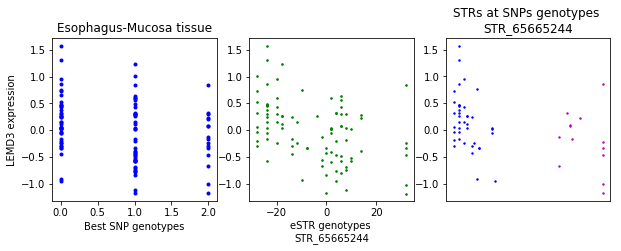


-----> chr2  gene  ENSG00000116001.11 ( TIA1 )  Causality Score:  0.437358878532 
Counts by SNP genotypes
0 (88, 3)
1 (19, 3)


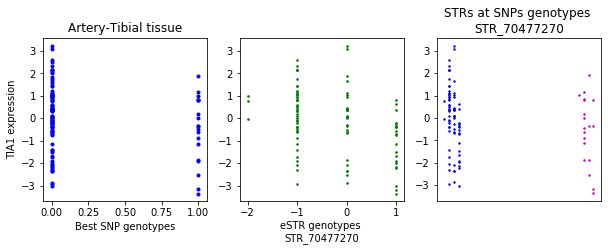


-----> chr19  gene  ENSG00000104907.8 ( TRMT1 )  Causality Score:  0.483386120733 
Counts by SNP genotypes
0 (40, 3)
2 (27, 3)
1 (60, 3)


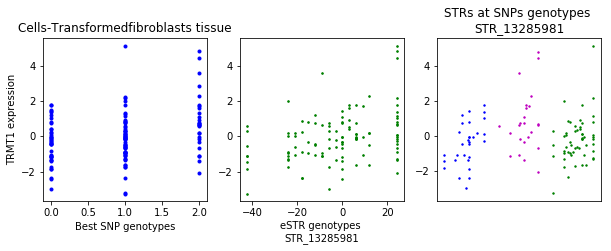


-----> chr16  gene  ENSG00000205937.7 ( RNPS1 )  Causality Score:  0.294518740229 
Counts by SNP genotypes
0 (48, 3)
2 (15, 3)
1 (46, 3)


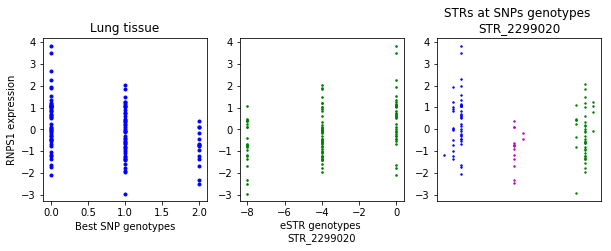


-----> chr19  gene  ENSG00000066044.9 ( ELAVL1 )  Causality Score:  0.186897878285 
Counts by SNP genotypes
0 (124, 3)
2 (1, 3)
1 (18, 3)


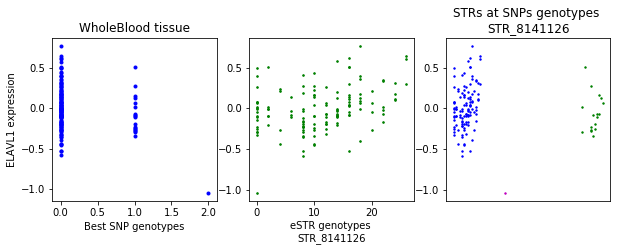

In [18]:
for gene in ['LEMD3', 'TIA1','TRMT1','RNPS1','ELAVL1']: #significant causal scores
    example=Erbpstr.loc[Erbpstr['gene.name']==gene]
    plotthat(example,BASEDIR )


-----> chr19  gene  ENSG00000142449.8 ( FBN3 )  Causality Score:  0.0314600937709 
Counts by SNP genotypes
0 (77, 3)
2 (3, 3)
1 (21, 3)


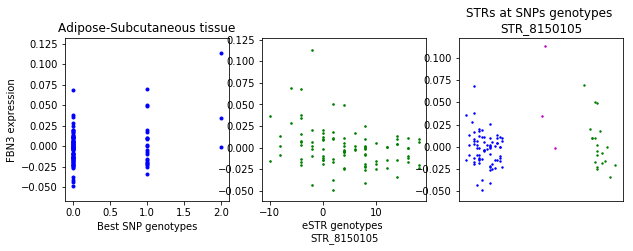


-----> chr19  gene  ENSG00000131142.9 ( CCL25 )  Causality Score:  0.0100634067305 
Counts by SNP genotypes
0 (23, 3)
2 (32, 3)
1 (72, 3)


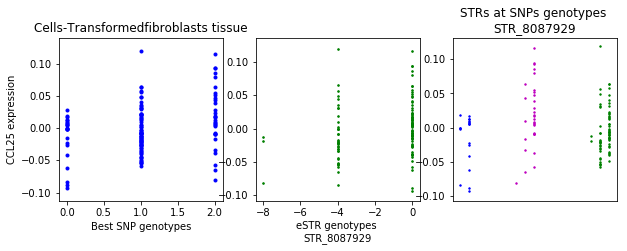

In [19]:
#lOOKING AT ELAV1 STR is on FBN3 intron
#2 neighboring gene of ELAVL1 (FBN3, CCL5)
plotthat(DATA1.loc[DATA1['gene.name']=='FBN3'],BASEDIR )
plotthat(DATA1.loc[DATA1['gene.name']=='CCL25'],BASEDIR )

In [56]:
"""
Figure X: transcription factors by tissue
    Gene_list:
        Column 1:	Hidden Markov Model identifier
        Column 2:	Sequence identifier
        Column 3:	Match region
        Column 4:	Family name
"""
trfac = pd.read_csv(TRFAC, sep='\t')
trfacgenes = list(set([x[1] for x in list(trfac.index)]))
testedgene = [x.split('.')[0] for x in list(DATA1['gene'])]
DATA1['gene.version'] = testedgene
TFgene = DATA1.loc[DATA1['gene.version'].isin(trfacgenes)]
len(trfacgenes)

36012